## **RF**

#### **Python Libraries**

In [127]:
import numpy as np
import pandas as pd 
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler 
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#### **Dataset**

In [126]:
hitters = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\Hitters.csv')
df = hitters.copy()
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [146]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Model**

In [131]:
rf_model = RandomForestRegressor(random_state = 42)
print(colored("\033[1m" + "Model: ", "blue"), rf_model.fit(X_train, y_train)) 

Model:  RandomForestRegressor(random_state=42)


#### **Predict**

In [136]:
print(colored("\033[1m" + "Sample Predicts: ", "blue"), rf_model.predict(X_test)[0:5]) 
y_pred = rf_model.predict(X_test)
print(colored("\033[1m" + "RMSE: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 

Sample Predicts:  [ 598.57816667 1161.28166667  598.57816667  453.21931533  155.95      ]
RMSE:  462.01087000489565


#### **Model Tuning**

In [147]:
rf_params = {'max_depth': list(range(1,10)),
             'max_features': [3,5,10,15],
             'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1)
rf_cv_model.fit(X_train, y_train)
print(colored("\033[1m" + "Best Parameters: ", "blue"), rf_cv_model.best_params_) 

Best Parameters:  {'max_depth': 8, 'max_features': 3, 'n_estimators': 200}


In [148]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(colored("\033[1m" + "RMSE: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  345.35396408501015


Text(0.5, 0, 'Variable Severity Levels')

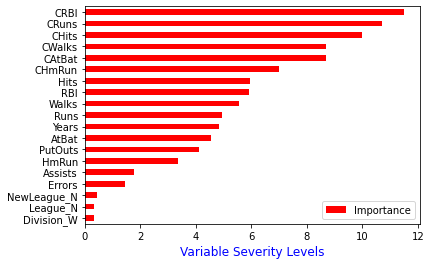

In [149]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Severity Levels", fontsize=12, color="blue")